<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# ANOVA - Analysis of variance

1. One-way ANOVA
2. Two-way ANOVA
3. ANCOVA - Analysis of covariance

---

## Import Packages
- Visual Python: Data Analysis > Import

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['axes.unicode_minus'] = False

## 1 One-way ANOVA

In [3]:
# Visual Python: Data Analysis > File
df1 = pd.read_csv('./data/09_1_일원분산분석.csv')
df1

,교육방법,판매실적
0,program A,65.0
1,program A,87.0
2,program A,73.0
3,program A,79.0
4,program A,81.0
5,program A,69.0
6,program B,75.0
7,program B,69.0
8,program B,83.0
9,program B,81.0


In [4]:
# Visual Python: ANOVA
from scipy import stats
def vp_confidence_interval(var, confidence_level=0.95):
    try: sr = pd.Series(var)
    except: return np.nan
    return stats.t.interval(confidence_level, df=sr.count()-1, loc=sr.mean(), scale=sr.std() / np.sqrt(sr.count()) )
def vp_sem(var):
    try: sr = pd.Series(var)
    except: return np.nan
    return sr.std() / np.sqrt(sr.count())

### Statistics

,Count,Mean,Std. Deviation,Min,Max,Std. Error Mean,Confidence interval,Lower,Upper
program A,6,75.666667,8.164966,65.0,87.0,3.333333,0.95,67.098061,84.235273
program B,7,78.428571,7.114706,69.0,90.0,2.689106,0.95,71.848565,85.008577
program C,6,70.833333,9.579492,59.0,83.0,3.910811,0.95,60.780273,80.886394
program D,4,87.750000,5.795113,80.0,94.0,2.897556,0.95,78.528682,96.971318


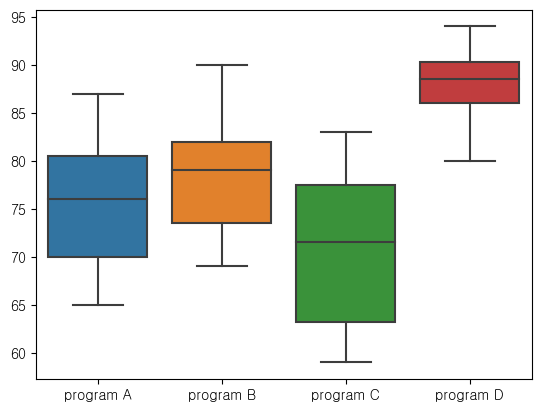

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),1.217841,0.330431


### One-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(교육방법),3.0,712.586439,237.528813,3.771461,0.028041
Residual,19.0,1196.630952,62.980576,NaN,NaN
Total,22.0,1909.217391,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
program A,program B,2.7619,0.9226,-9.653,15.1768,False
program A,program C,-4.8333,0.7201,-17.7168,8.0502,False
program A,program D,12.0833,0.1198,-2.3209,26.4875,False
program B,program C,-7.5952,0.3411,-20.0101,4.8196,False
program B,program D,9.3214,0.2718,-4.6652,23.308,False
program C,program D,16.9167,0.018,2.5125,31.3209,True


In [5]:
# Visual Python: ANOVA
# One-way ANOVA
vp_df = df1.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('교육방법')['판매실적'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                           'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                           'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Boxplot
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.boxplot(data=_df)
    plt.show()

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# One-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('판매실적 ~ C(교육방법)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### One-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['판매실적'], vp_df['교육방법']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

## 2 Two-way ANOVA

In [6]:
# Visual Python: Data Analysis > File
df2 = pd.read_csv('./data/09_2_이원분산분석.csv')
df2

,성별,여행빈도,해외여행선호도
0,남자,적음,2.0
1,남자,적음,3.0
2,남자,적음,2.0
3,남자,적음,4.0
4,남자,적음,2.0
5,남자,중간,4.0
6,남자,중간,4.0
7,남자,중간,5.0
8,남자,중간,3.0
9,남자,중간,3.0


### Statistics

Count  Mean  Std. Deviation  Min  Max  Std. Error Mean  \
남자 많음      5   7.6        1.140175  6.0  9.0         0.509902   
   적음      5   2.6        0.894427  2.0  4.0         0.400000   
   중간      5   3.8        0.836660  3.0  5.0         0.374166   
여자 많음      5   6.2        0.836660  5.0  7.0         0.374166   
   적음      5   6.2        0.836660  5.0  7.0         0.374166   
   중간      5   4.4        0.547723  4.0  5.0         0.244949   

       Confidence interval     Lower     Upper  
남자 많음                 0.95  6.184285  9.015715  
   적음                 0.95  1.489422  3.710578  
   중간                 0.95  2.761149  4.838851  
여자 많음                 0.95  5.161149  7.238851  
   적음                 0.95  5.161149  7.238851  
   중간                 0.95  3.719913  5.080087

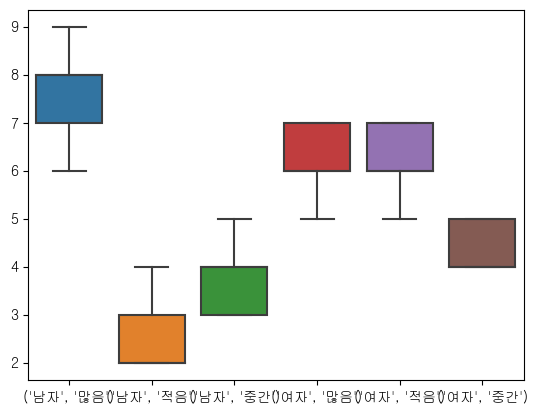

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),0.483019,0.785422


### Two-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(여행빈도),2.0,47.266667,23.633333,31.511111,1.936301e-07
C(성별),1.0,6.533333,6.533333,8.711111,6.962319e-03
C(여행빈도):C(성별),2.0,31.666667,15.833333,21.111111,5.134402e-06
Residual,24.0,18.000000,0.750000,NaN,NaN
Total,29.0,103.466667,NaN,NaN,NaN


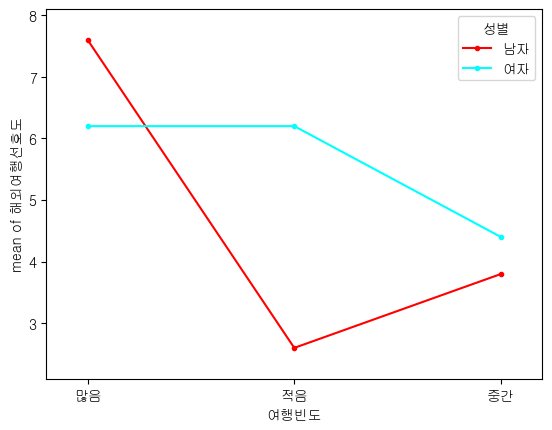

### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
많음,적음,-2.5,0.0017,-4.0997,-0.9003,True
많음,중간,-2.8,0.0005,-4.3997,-1.2003,True
적음,중간,-0.3,0.8882,-1.8997,1.2997,False


In [7]:
# Visual Python: ANOVA
# Two-way ANOVA
vp_df = df2.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby(['성별','여행빈도'])['해외여행선호도'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)
    _df.columns = [[x[0] for x in _df.columns],[x[1] for x in _df.columns]]

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                   'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                   'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Boxplot
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.boxplot(data=_df)
    plt.show()

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# Two-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('해외여행선호도 ~ C(여행빈도) + C(성별) + C(여행빈도):C(성별)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### Two-way ANOVA'))
display(_dfr)

# Interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    fig = interaction_plot(x=vp_df['여행빈도'], trace=vp_df['성별'], response=vp_df['해외여행선호도'])
    plt.show()

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['해외여행선호도'], vp_df['여행빈도']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

## 3 ANCOVA - Analysis of covariance

In [8]:
# Visual Python: Data Analysis > File
df3 = pd.read_csv('./data/09_3_공분산분석.csv')
df3

,광고,사전태도,제품태도
0,유머,5.0,5.0
1,유머,3.0,4.0
2,유머,3.0,3.0
3,유머,4.0,4.0
4,유머,2.0,2.0
5,유머,3.0,3.0
6,이성,2.0,2.0
7,이성,1.0,2.0
8,이성,2.0,3.0
9,이성,1.0,1.0


### Statistics

,Count,Mean,Std. Deviation,Min,Max,Std. Error Mean,Confidence interval,Lower,Upper
감성,6,2.833333,0.752773,2.0,4.0,0.307318,0.95,2.043347,3.623320
유머,6,3.500000,1.048809,2.0,5.0,0.428174,0.95,2.399343,4.600657
이성,6,2.000000,0.632456,1.0,3.0,0.258199,0.95,1.336279,2.663721


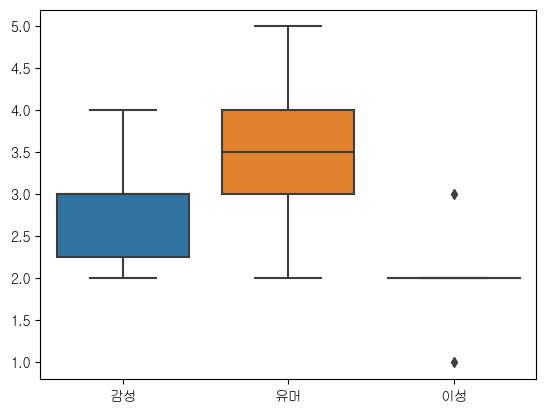

### ANCOVA - Analysis of covariance

C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Source,SS,DF,F,p-unc,np2
0,광고,0.000993,2,0.002081,0.997921,0.000297
1,사전태도,6.991935,1,29.295253,0.000092,0.676639
2,Residual,3.341398,14,NaN,NaN,NaN


In [9]:
# Visual Python: ANOVA
# ANCOVA - Analysis of covariance
vp_df = df3.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('광고')['제품태도'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                   'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                   'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Boxplot
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.boxplot(data=_df)
    plt.show()

# ANCOVA - Analysis of covariance
import pingouin as pg
display(Markdown('### ANCOVA - Analysis of covariance'))
display(pg.ancova(data=vp_df, dv='제품태도', between='광고', covar='사전태도'))

---

In [10]:
# End of file